# pandasai DataFrame.chat() и follow_up() Example


This notebook demonstrates how to use the `chat()` method of the `pandasai DataFrame` class from the `pandas-ai` library.
The `chat()` method is the primary way to interact with a pandasai DataFrame. You can ask questions in natural language, and the pandasai DataFrame will generate the code to answer your questions and execute it.


In [10]:
from pandasai_litellm.litellm import LiteLLM
import pandasai as pai
import pandas as pd

import os

# Load environment variables from .env file
load_dotenv()


api_key = os.getenv("OPENAI_API_KEY", "your-api-key")
llm = LiteLLM(model="gpt-5-mini", api_key=api_key)

pai.config.set({
    "llm": llm,
    "save_logs": True,
    "max_retries": 3
})

# 2. Prepare DataFrame
sales_raw = pd.DataFrame([
    {"region": "EU", "channel": "Online", "revenue": 125000,
        "units": 420, "week": "2024-01-05"},
    {"region": "US", "channel": "Retail", "revenue": 174000,
        "units": 510, "week": "2024-01-05"},
    {"region": "APAC", "channel": "Online", "revenue": 98000,
        "units": 360, "week": "2024-01-12"},
])


# 3. Chat with the DataFrame
response = pai.chat("What is the total revenue?", sales_raw)
print(response)


397000


In [11]:
response = pai.chat("Определи мат статистики по выручке", sales_raw)
print(response)


  region  cnt  sum_revenue  mean_revenue  median_revenue  stddev_revenue  \
0    ALL    3     397000.0     132333.33        125000.0         31457.2   
1   APAC    1      98000.0      98000.00         98000.0             0.0   
2     EU    1     125000.0     125000.00        125000.0             0.0   
3     US    1     174000.0     174000.00        174000.0             0.0   

    var_revenue  q1_revenue  q3_revenue  min_revenue  max_revenue  
0  9.895556e+08    111500.0    149500.0        98000       174000  
1  0.000000e+00     98000.0     98000.0        98000        98000  
2  0.000000e+00    125000.0    125000.0       125000       125000  
3  0.000000e+00    174000.0    174000.0       174000       174000  


In [12]:
response = pai.chat("Что из мат статистик по выручке тебе кажется странным?", sales_raw)
print(response)

Краткая проверка мат. статистик по выручке:
- Общее количество записей: 3 (очень мало, выборка маленькая — выводы ненадёжны).
- Средняя выручка: 132333.33, медиана: 125000.00, стандартное отклонение: 31457.20.
- Медиана меньше средней (median=125000 < mean=132333), значит распределение правосторонне сдвинуто из-за больших значений (вписан выброс сверху).
- Максимальная выручка: 174000 в US (Retail), минимальная: 98000 в APAC.
- Разница в выручке на единицу: max 341.18, min 272.22 — заметна существенная вариация.

Итого: самое странное — малый объём данных (n=3) и сильное влияние одной большой точки (US/Retail) на среднее, из-за чего среднее больше медианы. Рекомендация: собрать больше наблюдений и посмотреть распределение выручки и долю каждой записи.


Проверка нормальности распределения выручки:
- Объём выборки n = 3.
- Среднее = 132333.33, медиана = 125000.00, std = 31457.20.
- Асимметрия (skewness) = 0.826, избыток куртоза = -1.500.
- Результаты статистических тестов:
  - Shapiro-Wilk: p=0.6837 ≥ 0.05 → нет оснований отвергать нормальность.
  - D'Agostino (normaltest): не применимо (нужен n ≥ ~8).
  - Anderson-Darling: statistic=0.2200 > critical(5%)=-1.7710 → отвергаем нормальность.
  - Не удалось построить графики: [Errno 2] No such file or directory: '/var/folders/fq/rxr8bd8d531ctfj_lr0_szp00000gn/T/tmppeigpo0pexports/charts/temp_chart_b4b13b8c-31ae-4552-9eec-fc111ea93b06.png'
Интерпретация: объём данных очень мал (n < 8), поэтому результаты тестов ненадёжны. Рекомендуется собрать больше данных (как минимум n ≥ 30 для более стабильных выводов) и визуально оценить распределение (гистограмма и QQ-plot).
Проверка нормальности распределения выручки:
- Объём выборки n = 3.
- Среднее = 132333.33, медиана = 125000.00, std = 31457.20.


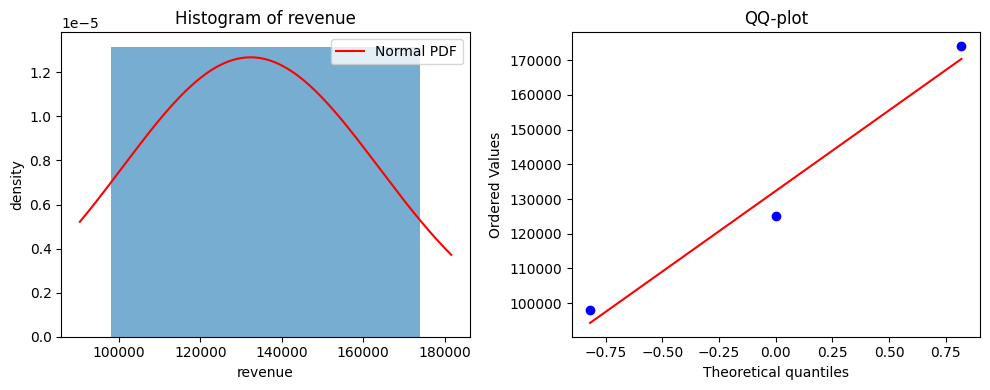

In [13]:
second_answer = pai.follow_up("Проверь нормальность распределения для выручки или нет?")
print(second_answer)
